# Multi-qubit Gates

In [ ]:
from qiskit import *
from qiskit import QuantumCircuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
%matplotlib inline

import warnings; warnings.filterwarnings("ignore")

In [ ]:
from qiskit.quantum_info import Statevector

# CNOT Gate

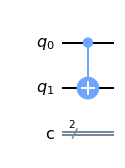

In [76]:
qc=QuantumCircuit(2,2)
qc.cx(0,1)
qc.draw('mpl')

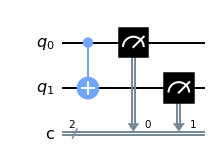

In [77]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

In [78]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result().get_statevector()

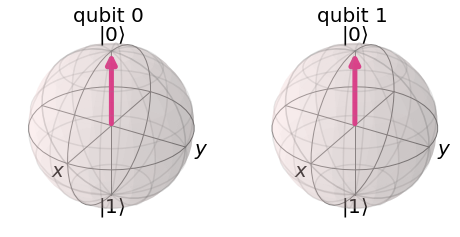

In [79]:
plot_bloch_multivector(result)

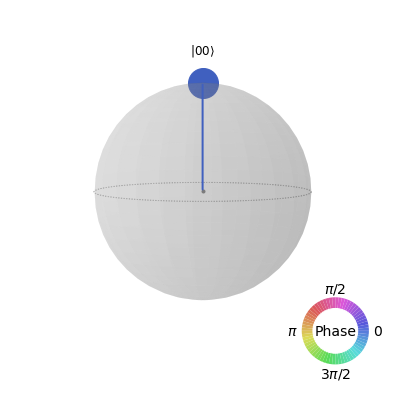

In [80]:
plot_state_qsphere(result)

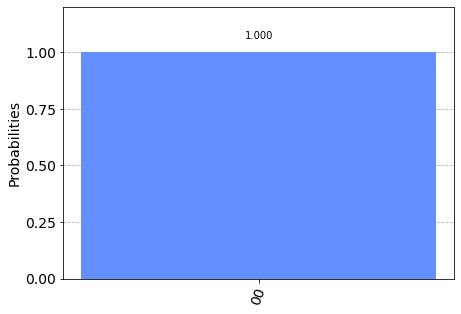

In [83]:

result = execute(qc,backend).result().get_counts()
plot_histogram(counts)

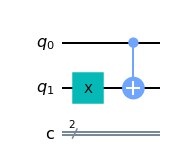

In [84]:
qc1=QuantumCircuit(2,2)
#qc1.x(0)
qc1.x(1)
qc1.cx(0,1)
qc1.draw('mpl')

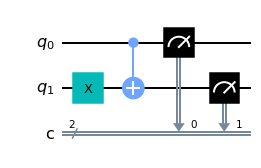

In [85]:
qc1.measure(0,0)
qc1.measure(1,1)
qc1.draw()

In [86]:

backend = Aer.get_backend('statevector_simulator')
result1 = execute(qc1,backend).result().get_statevector()

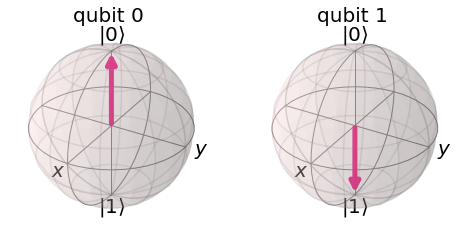

In [87]:
plot_bloch_multivector(result1)

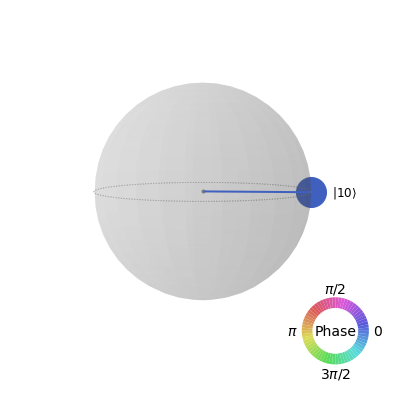

In [88]:
plot_state_qsphere(result1)

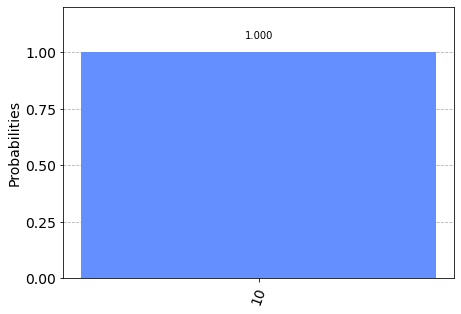

In [89]:
counts1 = execute(qc1,backend).result().get_counts()
plot_histogram(counts1)

# CZ Gate

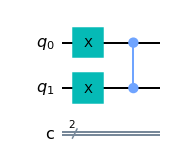

In [3]:
qc=QuantumCircuit(2,2)
qc.x(0)
qc.x(1)
qc.cz(0,1)
qc.draw()

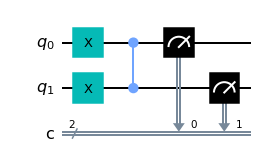

In [5]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

In [6]:
backend = Aer.get_backend('statevector_simulator')
result1 = execute(qc,backend).result().get_statevector()

In [10]:
result1

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))


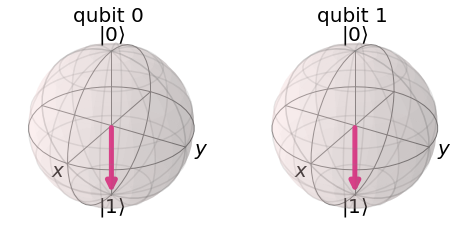

In [12]:
plot_bloch_multivector(result1)

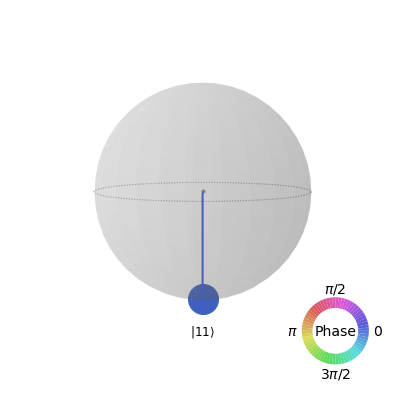

In [13]:
plot_state_qsphere(result1)


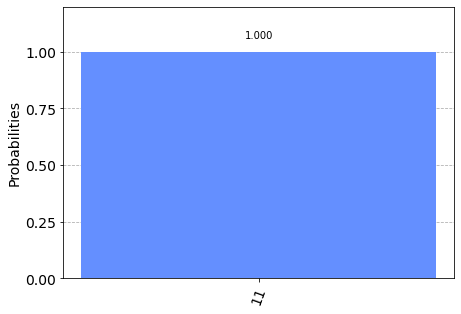

In [14]:
counts1 = execute(qc,backend).result().get_counts()
plot_histogram(counts1)

# SWAP Gate

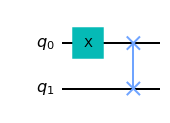

In [25]:
qc=QuantumCircuit(2)
qc.x(0)
qc.swap(0,1)
qc.draw()

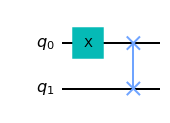

In [26]:
#qc.measure(0,0)
#qc.measure(1,1)
qc.draw()

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


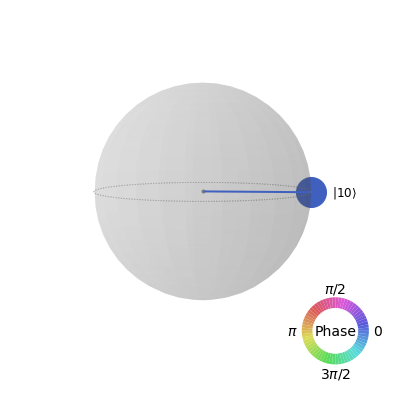

In [27]:
sv = Statevector.from_label('00')
new_sv = sv.evolve(qc)
print(new_sv)
plot_state_qsphere(new_sv.data)

In [28]:
result1 = execute(qc,backend).result().get_statevector()
result1

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


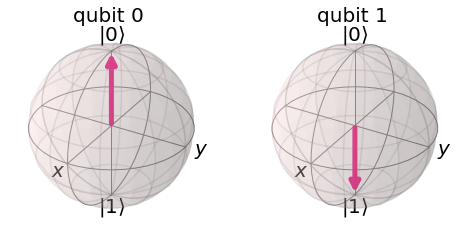

In [29]:
plot_bloch_multivector(result1)

# CSWAP Gate

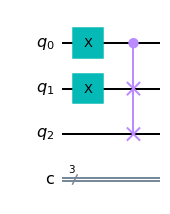

In [30]:
qc=QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.cswap(0,1,2)
qc.draw()

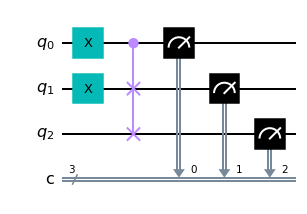

In [31]:
qc.measure([0,1,2],[0,1,2])
qc.draw()

In [32]:
result=execute(qc,backend).result().get_statevector()

In [33]:
result  #101

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


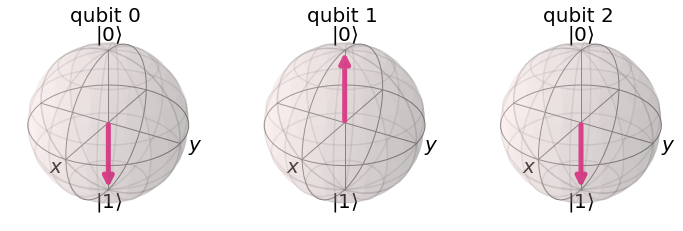

In [36]:
plot_bloch_multivector(result)

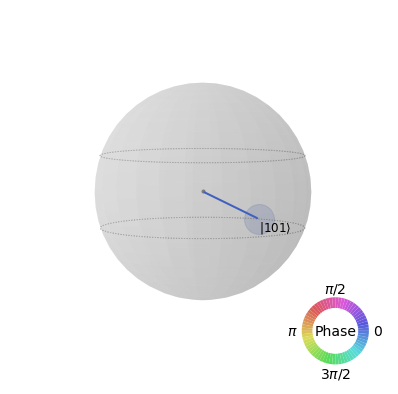

In [37]:
plot_state_qsphere(result)

# CCNOT Gate

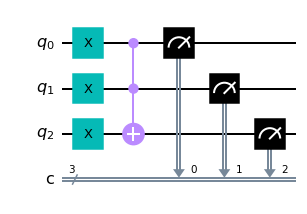

In [45]:
qc=QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.x(2)
qc.ccx(0,1,2)
qc.measure([0,1,2],[0,1,2])
qc.draw()

In [46]:
result=execute(qc,backend).result().get_statevector()
result

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


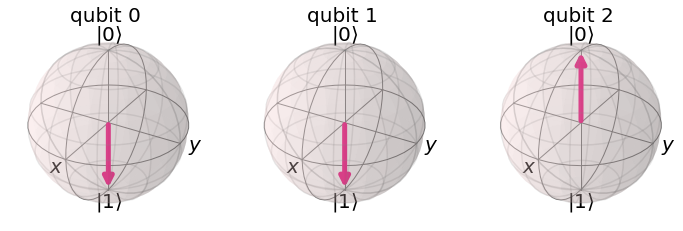

In [47]:
plot_bloch_multivector(result)

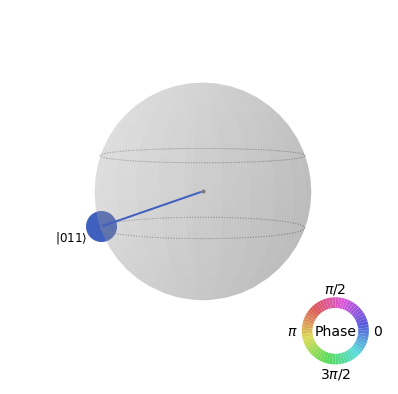

In [48]:
plot_state_qsphere(result)

In [51]:
res=execute(qc,backend, shots=1024).result().get_counts()
res

{'011': 1024}

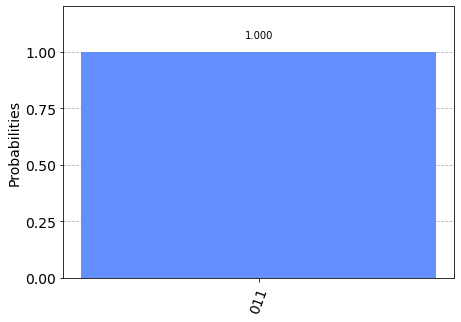

In [52]:
plot_histogram(res)

# Measurements

In the above example, we simulated the action of a measurement by sampling counts from the statevector. A measurement can explicitly be inserted into a quantum circuit as well. Here is an example that creates the same Bell state and applies a measurement.

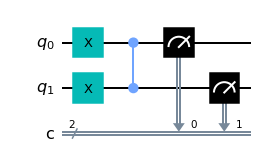

In [53]:
mycircuit = QuantumCircuit(2, 2)
mycircuit.x(0)
mycircuit.x(1)
mycircuit.cz(0,1)
mycircuit.measure([0,1], [0,1])
mycircuit.draw('mpl')

Two new features appeared in the circuit compared to our previous examples.

First, note that we used a second argument in the QuantumCircuit(2,2) command. The second argument says that we will be creating a quantum circuit that contains two qubits (the first argument), and two classical bits (the second argument).

Second, note that the measure command takes two arguments. The first argument is the set of qubits that will be measured. The second is the set of classical bits onto which the outcomes from the measurements of the qubits will be stored.

Since the above quantum circuit contains non-unitaries (the measurement gates), we will use Qiskit's built-in Aer simulators to run the circuit. To get the measurement counts, we can use the following code:

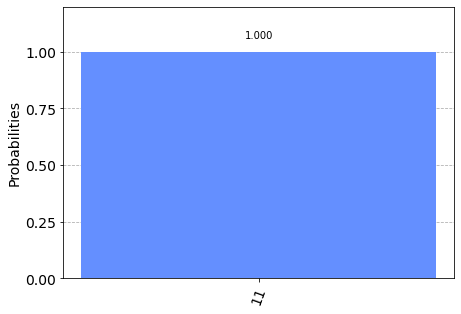

In [57]:
from qiskit import Aer, execute
#simulator = Aer.get_backend('qasm_simulator')
simulator = Aer.get_backend('statevector_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

In [58]:
counts

{'11': 10000}

In [22]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.3',
 'qiskit-aer': '0.7.3',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.4'}